## Data Analysis of American Baby Names 

<p>How have American baby name tastes changed since 1920?  Which names have remained popular for over 100 years, and how do those names compare to more recent top baby names? The goal of this project is to answer these questions. </p>

### Data
<p>The data is provided by the United States Social Security Administration, which lists first names along with the number and sex of babies they were given to in each year. For processing speed purposes, the dataset is limited to first names which were given to over 5,000 American babies in a given year. The data spans 101 years, from 1920 through 2020.</p>
<h3 id="baby_names"><code>baby_names</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>year</td>
</tr>
<tr>
<td style="text-align:left;"><code>first_name</code></td>
<td>varchar</td>
<td>first name</td>
</tr>
<tr>
<td style="text-align:left;"><code>sex</code></td>
<td>varchar</td>
<td><code>sex</code> of babies given <code>first_name</code></td>
</tr>
<tr>
<td style="text-align:left;"><code>num</code></td>
<td>int</td>
<td>number of babies of <code>sex</code> given <code>first_name</code> in that <code>year</code></td>
</tr>
</tbody>
</table>

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
#  read the CSV
df = pd.read_csv('usa_baby_names.csv')


#  connect to a database
conn = sqlite3.connect("baby_names.db") #if the db does not exist, this creates a Any_Database_Name.db file in the current directory


#storing table in the database
#df.to_sql('baby_names', conn)

In [4]:
pd.read_sql('SELECT * FROM baby_names', conn)

,index,year,first_name,sex,num
0,0,1920,Mary,F,70982
1,1,1920,Dorothy,F,36643
2,2,1920,Helen,F,35097
3,3,1920,Margaret,F,27994
4,4,1920,Ruth,F,26101
...,...,...,...,...,...
12644,12644,2020,Nolan,M,5164
12645,12645,2020,Christian,M,5043
12646,12646,2020,Aaron,M,5039
12647,12647,2020,Cameron,M,5019


### Data Analysis

#### 1. Classic American names

In [5]:
classic_names = pd.read_sql(
"""
SELECT first_name,
       SUM(num)
FROM baby_names
GROUP BY first_name
HAVING COUNT(year) = 101
ORDER BY SUM(num) DESC;
""",
conn)
classic_names

,first_name,SUM(num)
0,James,4748138
1,John,4510721
2,William,3614424
3,David,3571498
4,Joseph,2361382
5,Thomas,2166802
6,Charles,2112352
7,Elizabeth,1436286


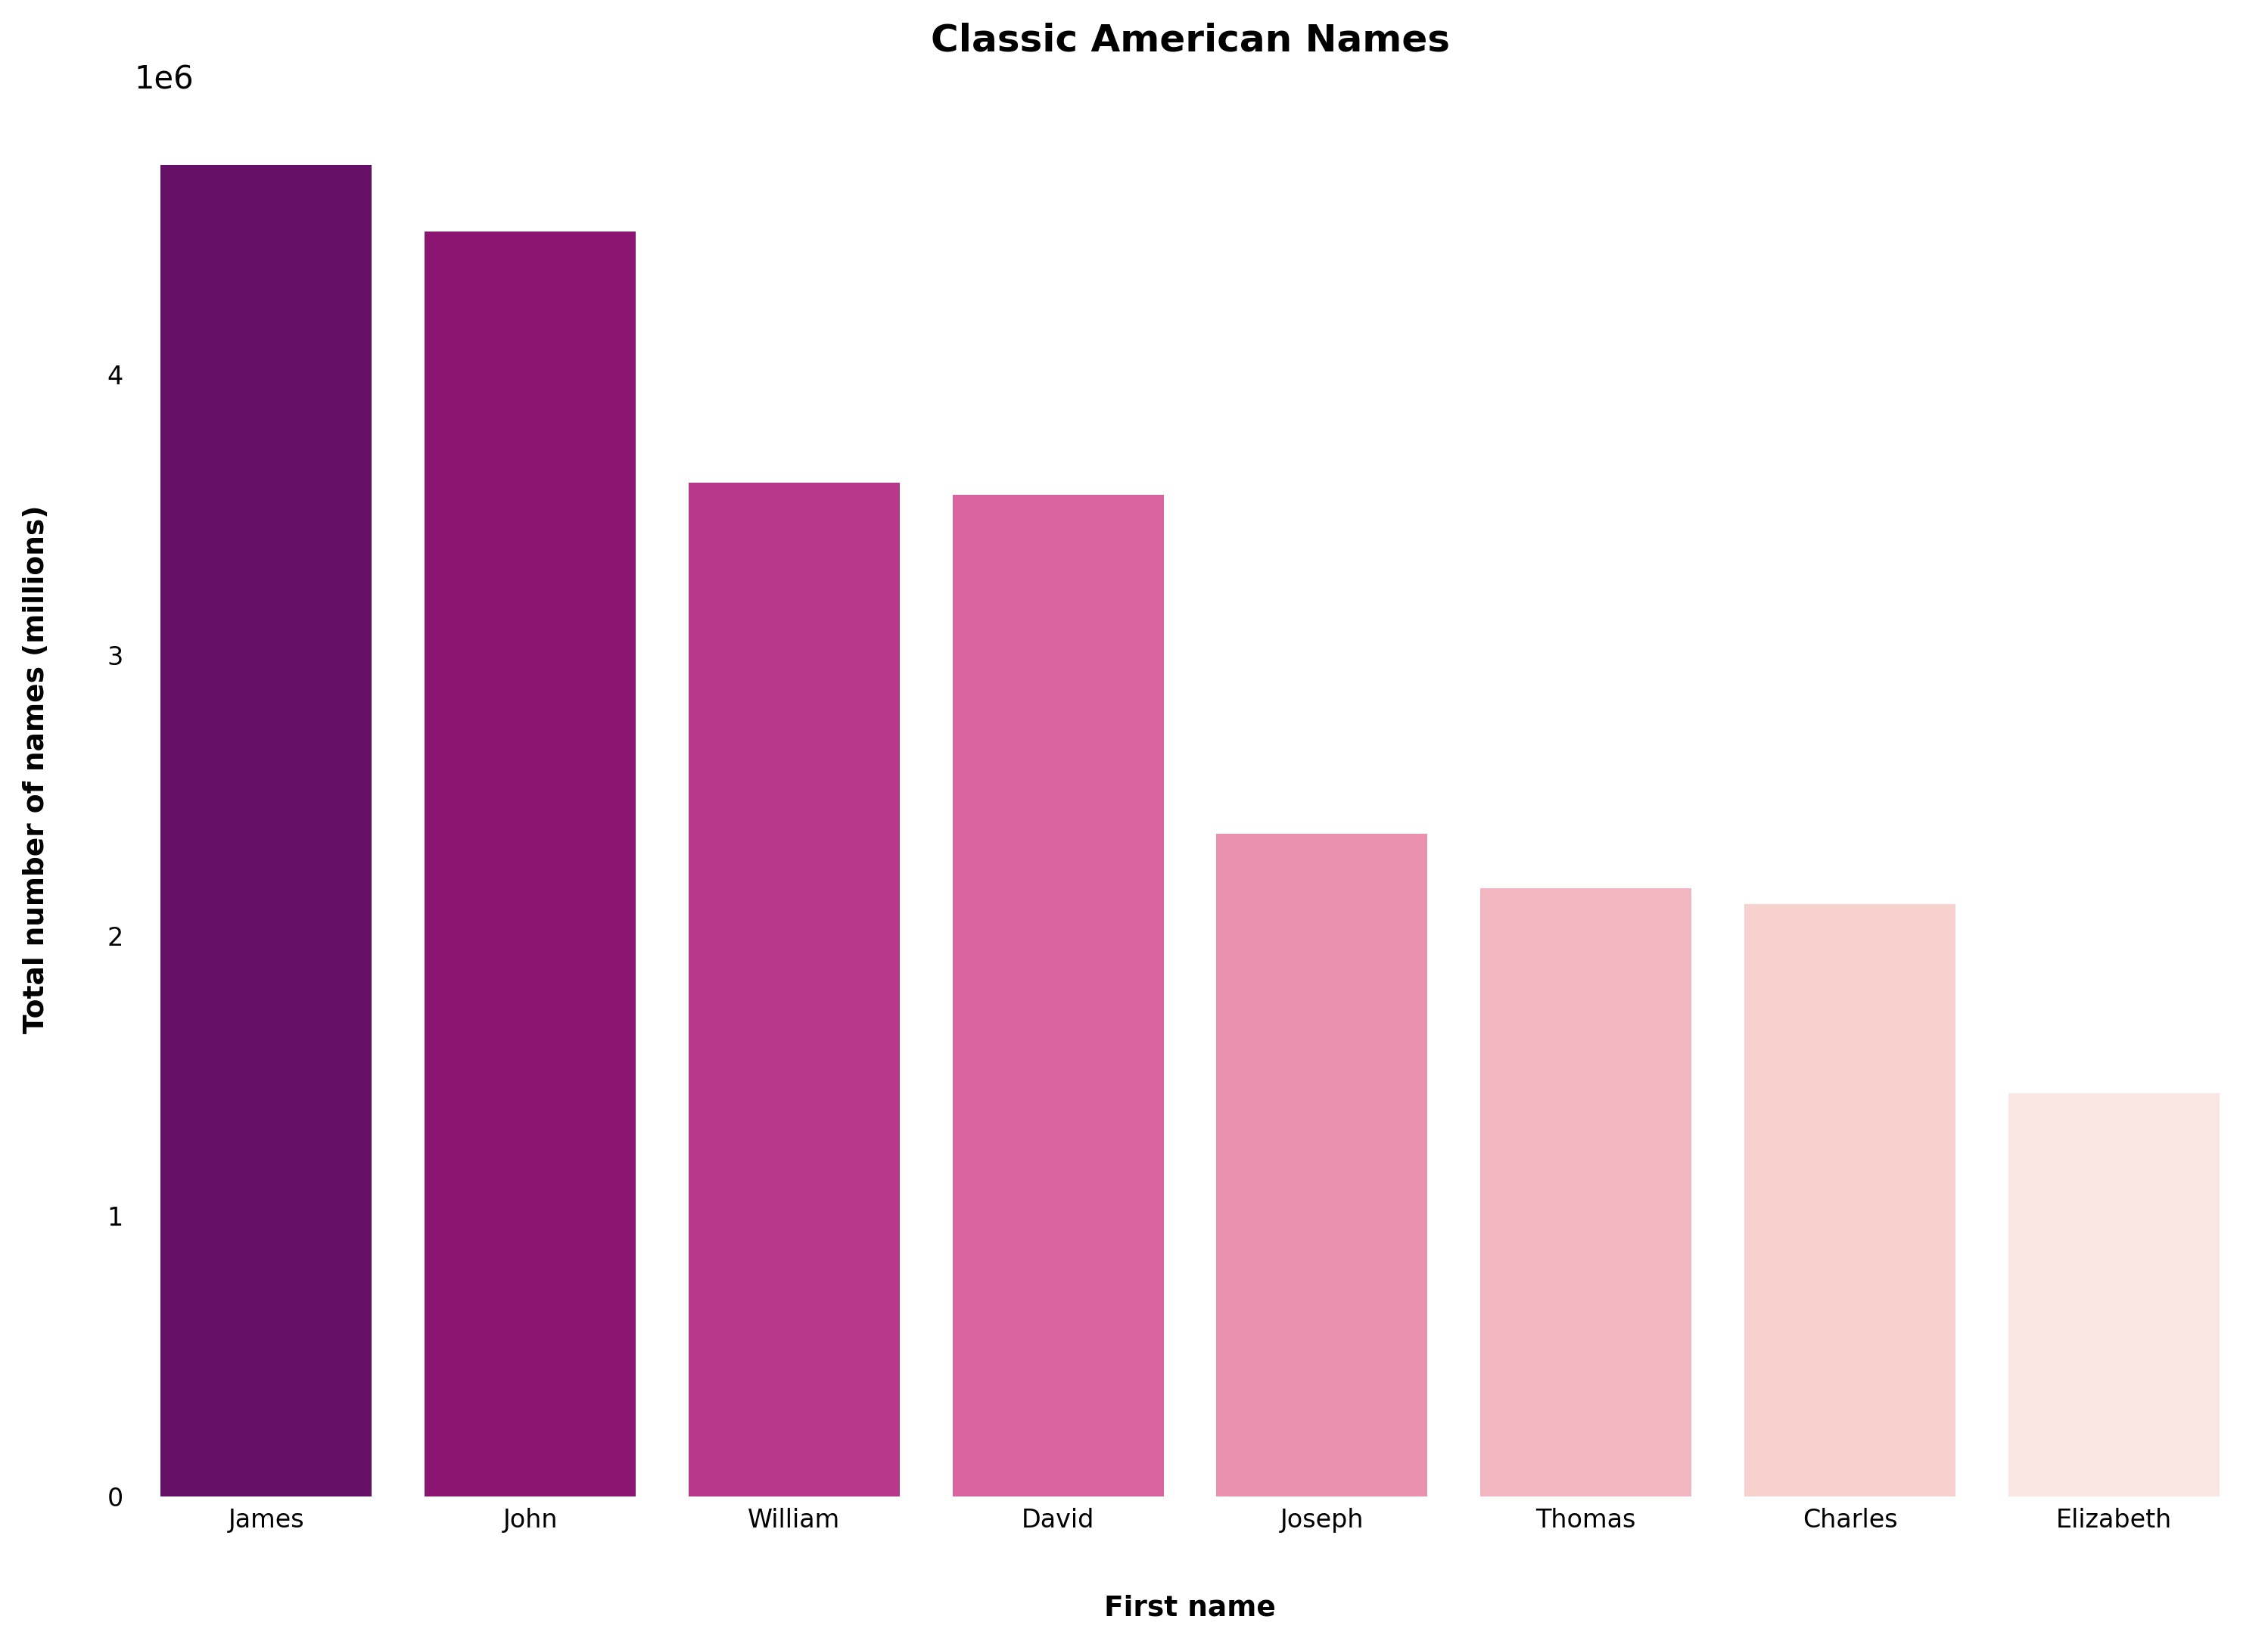

In [6]:
fig, ax = plt.subplots(dpi=300, figsize=(12, 8))

sns.barplot(data=classic_names, x='first_name', y='SUM(num)', ax=ax, palette='RdPu_r')

ax.tick_params(axis='x', zorder=0, length=0, labelsize = 8)
ax.tick_params(axis='y', zorder=0, length=0, labelsize = 8)

ax.set_xlabel('First name', weight='bold', fontsize=9)
ax.set_ylabel('Total number of names (millions)', weight='bold', fontsize=9, rotation=90)

ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.04, .52)

plt.title('Classic American Names', fontsize=12, weight='bold', x=.5, y=1.02)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

It looks like there are a lot of timeless traditionally male names. Elizabeth is holding her own for the female names, too.

#### 2. Timeless or trendy?

Now, in order to understand the dataset better, I am going to look at all names. The question I want to answer in particular: was the name classic and popular across many years or trendy, only popular for a few years?

In [7]:
pd.read_sql(
"""
SELECT first_name,
       SUM(num),
       CASE WHEN COUNT(first_name) > 80 THEN 'Classic'
            WHEN COUNT(first_name) > 50 THEN 'Semi-classic'
            WHEN COUNT(first_name) > 20 THEN 'Semi-trendy'
            ELSE 'Trendy' END AS popularity_type
FROM baby_names
GROUP BY first_name
ORDER BY first_name;
""",
conn)

,first_name,SUM(num),popularity_type
0,Aaliyah,15870,Trendy
1,Aaron,530592,Semi-classic
2,Abigail,338485,Semi-trendy
3,Adam,497293,Semi-trendy
4,Addison,107433,Trendy
...,...,...,...
542,Wyatt,128168,Trendy
543,Xavier,51892,Trendy
544,Zachary,483955,Semi-trendy
545,Zoe,78773,Trendy


#### 3. Top-ranked female names since 1920

Since there aren't many traditionally female names in the classic American names search, I'm going to limit the search to names which were given to female babies.

What are the top-ranked female names since 1920?

In [22]:
top_female_names = pd.read_sql(
"""
SELECT RANK() OVER(ORDER BY SUM(num) DESC) AS name_rank,
       first_name,
       SUM(num)
FROM baby_names
WHERE sex = 'F'
GROUP BY first_name
LIMIT 10;
""",
conn)
top_female_names

,name_rank,first_name,SUM(num)
0,1,Mary,3215850
1,2,Patricia,1479802
2,3,Elizabeth,1436286
3,4,Jennifer,1404743
4,5,Linda,1361021
5,6,Barbara,1343901
6,7,Susan,1025728
7,8,Jessica,994210
8,9,Lisa,920119
9,10,Betty,893396


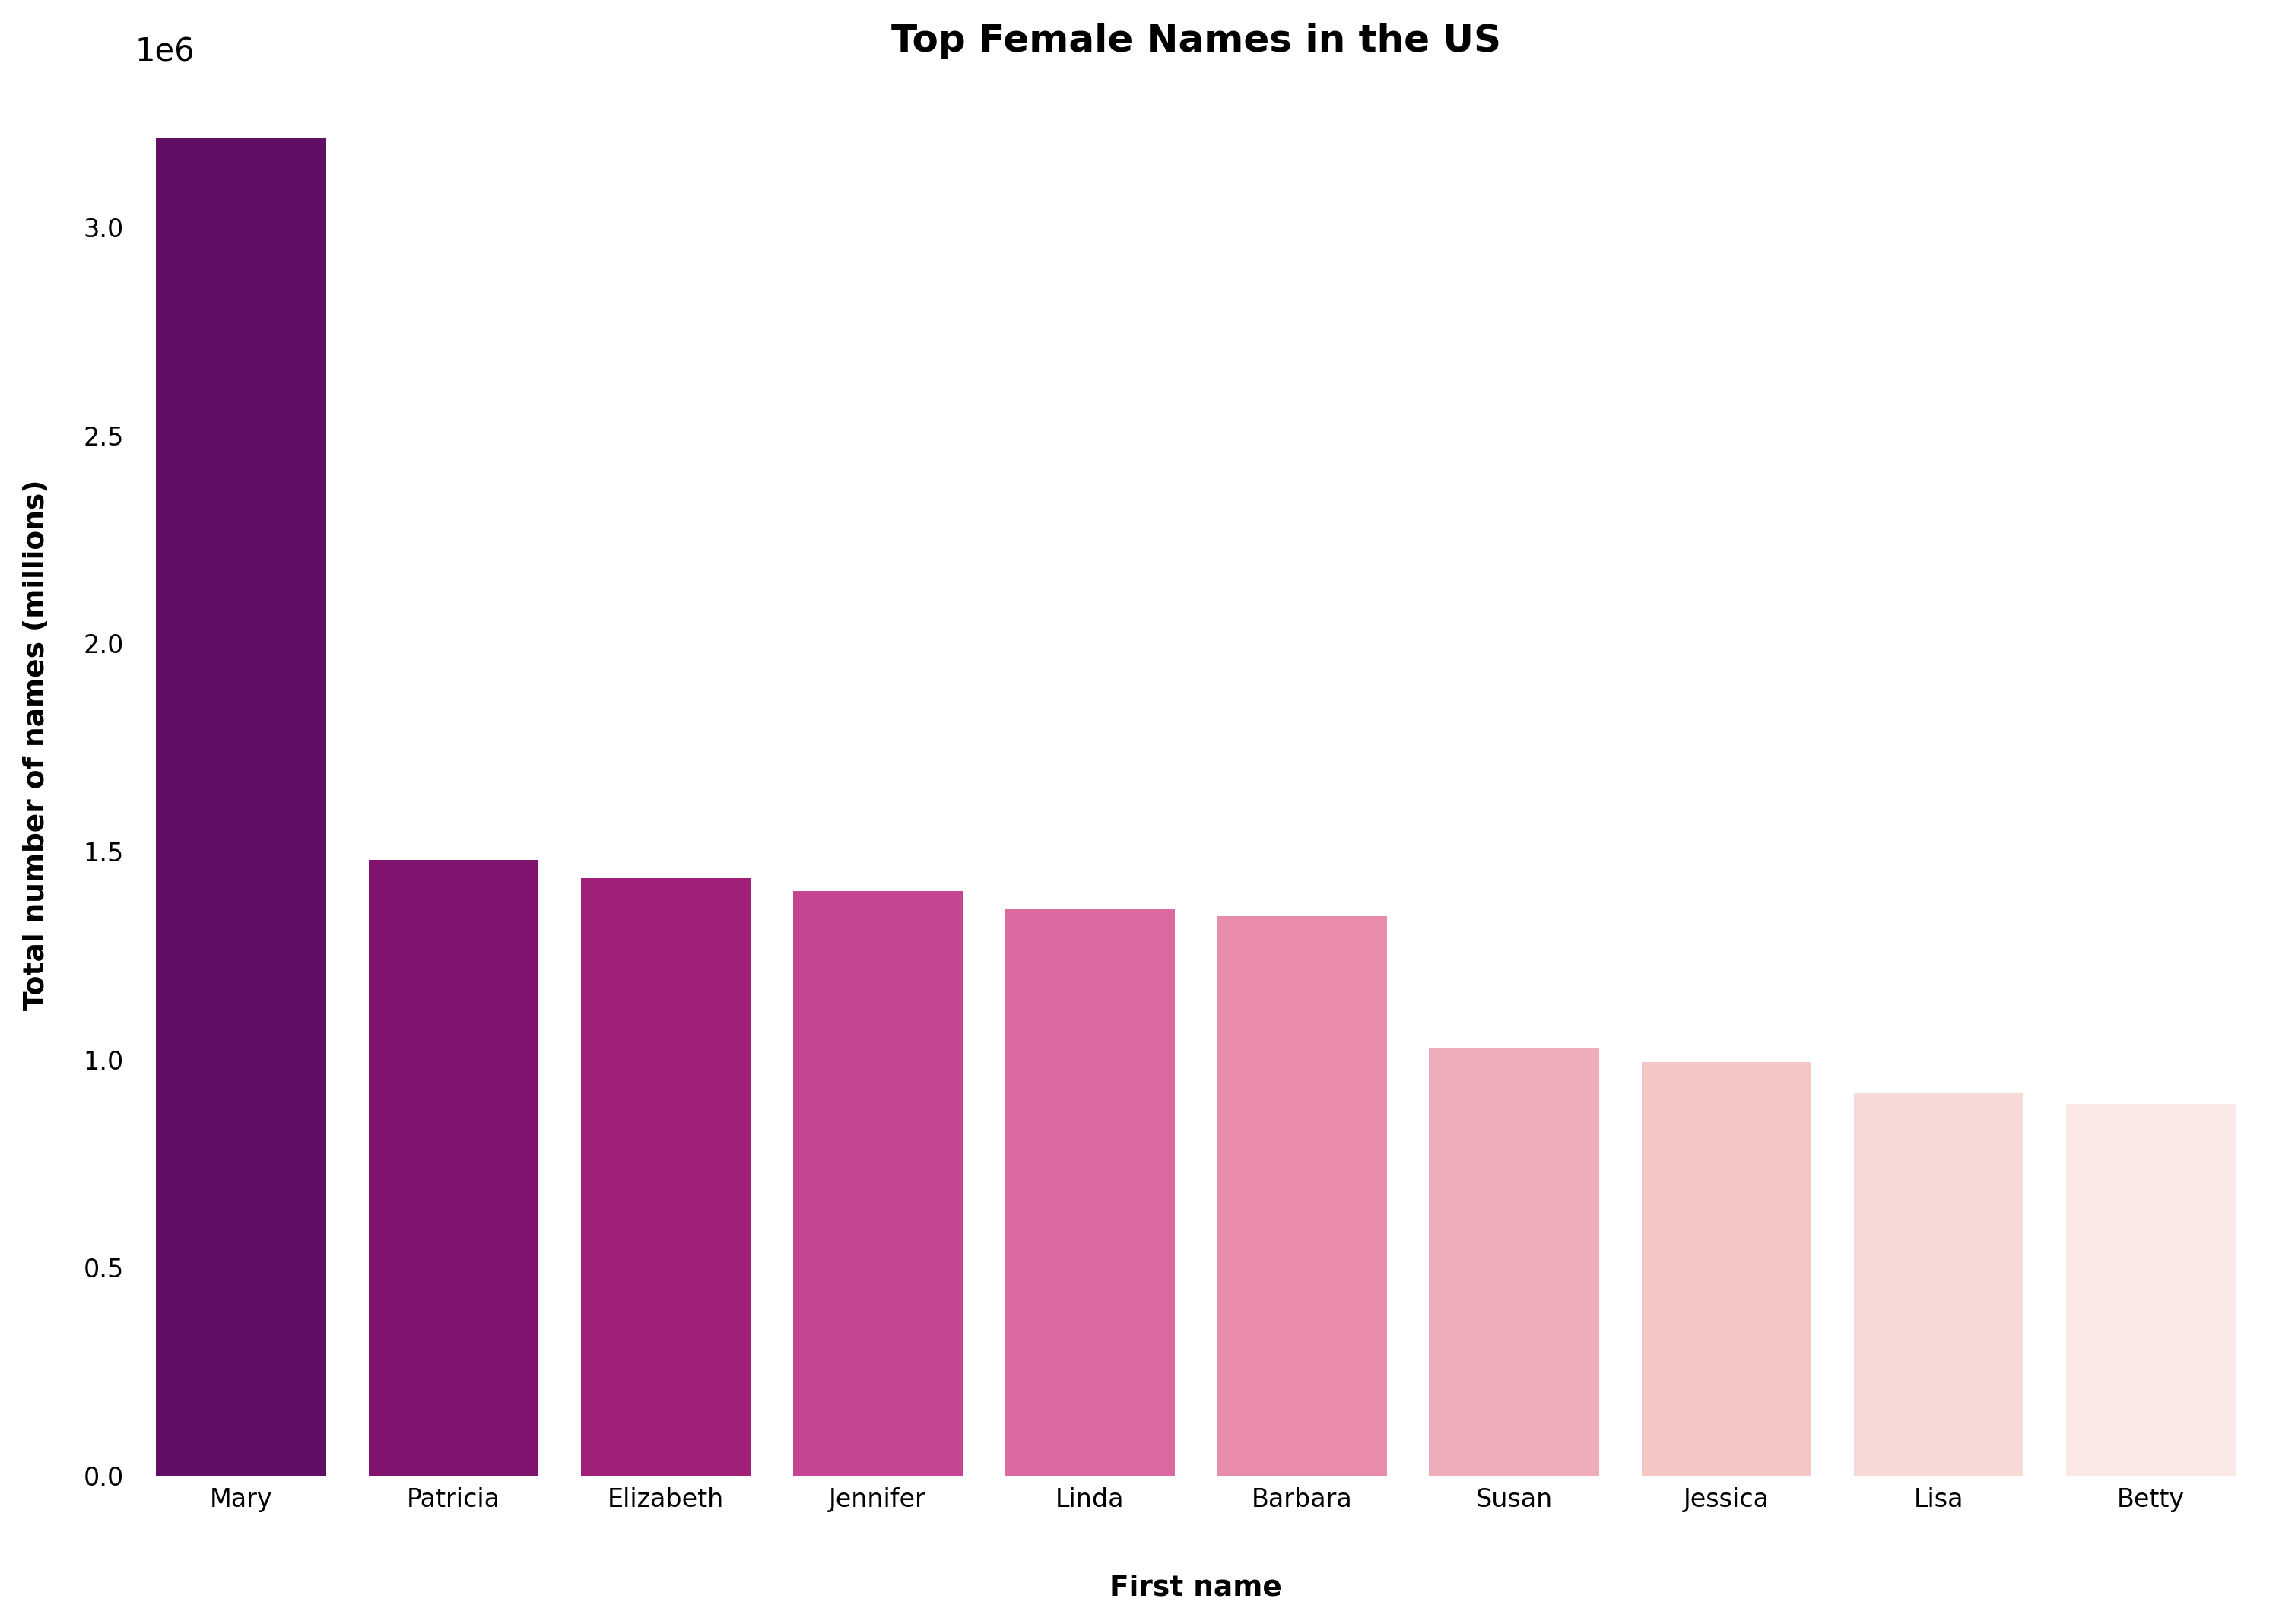

In [23]:
fig, ax = plt.subplots(dpi=300, figsize=(12, 8))

sns.barplot(data=top_female_names, x='first_name', y='SUM(num)', ax=ax, palette='RdPu_r')

ax.tick_params(axis='x', zorder=0, length=0, labelsize = 8)
ax.tick_params(axis='y', zorder=0, length=0, labelsize = 8)

ax.set_xlabel('First name', weight='bold', fontsize=9)
ax.set_ylabel('Total number of names (millions)', weight='bold', fontsize=9, rotation=90)

ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.04, .52)

plt.title('Top Female Names in the US', fontsize=12, weight='bold', x=.5, y=1.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

#### 4. Picking a baby name

Now, I'm going to assume the following scenario. A friend needs help choosing a name for her baby, a girl. She doesn't like any of the top-ranked names.

She's set on a traditionally female name ending in the letter 'a' since she's heard that vowels in baby names are trendy. She's also looking for a name that has been popular in the years since 2015.

I am going to find some options for this friend.

In [10]:
pd.read_sql(
"""
SELECT first_name
FROM baby_names
WHERE (sex = 'F') AND (year > 2015) AND (first_name LIKE ('%a'))
GROUP BY first_name
ORDER BY SUM(num) DESC;
""",
conn)

,first_name
0,Olivia
1,Emma
2,Ava
3,Sophia
4,Isabella
5,Mia
6,Amelia
7,Ella
8,Sofia
9,Camila


#### 5. The rise of the name "Olivia"

Based on the results above, it can be seen that Olivia is the most popular female name ending in 'A' since 2015. When did the name Olivia become so popular?

I'm going to explore the rise of the name Olivia.

In [11]:
olivia = pd.read_sql(
"""
SELECT year,
       first_name,
       num,
       SUM(num) OVER(ORDER BY year) AS cumulative_olivias
FROM baby_names
WHERE first_name = 'Olivia'
ORDER BY year;
""",
conn)
olivia

,year,first_name,num,cumulative_olivias
0,1991,Olivia,5601,5601
1,1992,Olivia,5809,11410
2,1993,Olivia,6340,17750
3,1994,Olivia,6434,24184
4,1995,Olivia,7624,31808
5,1996,Olivia,8124,39932
6,1997,Olivia,9477,49409
7,1998,Olivia,10610,60019
8,1999,Olivia,11255,71274
9,2000,Olivia,12852,84126


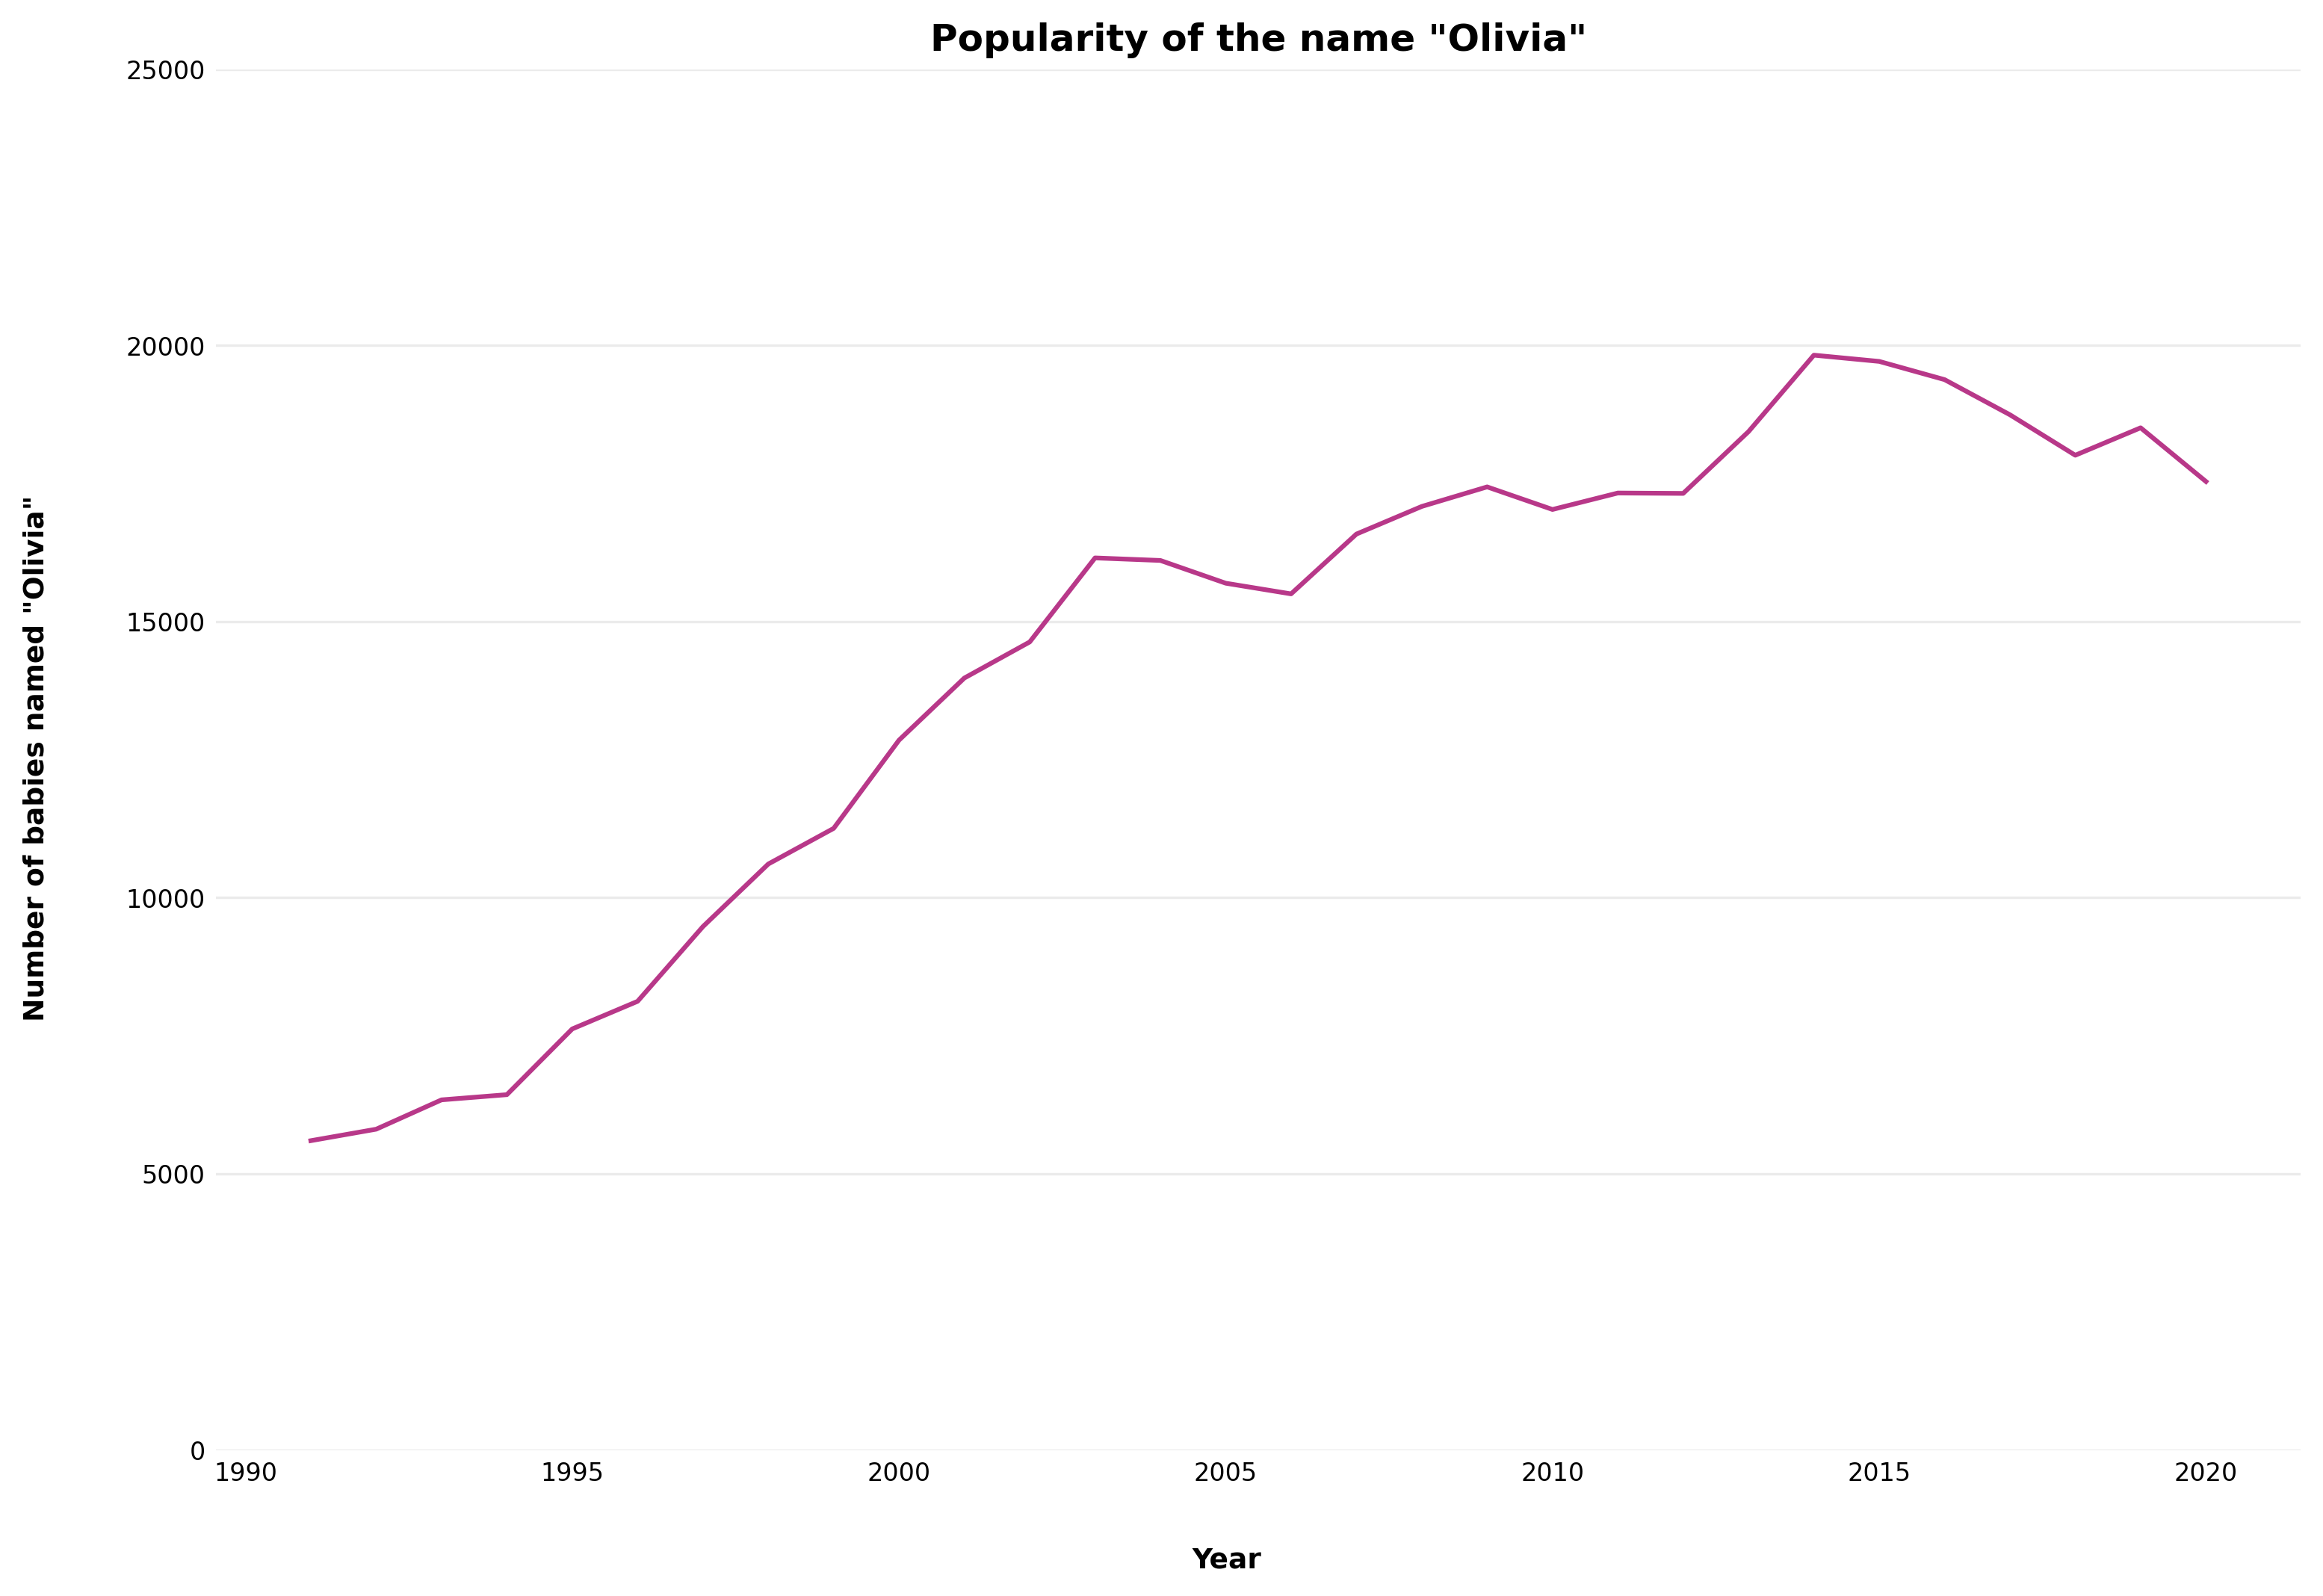

In [12]:
fig, ax = plt.subplots(dpi=300, figsize=(12, 8))

sns.lineplot(data=olivia, x='year', y='num', ax=ax, color='#B83889')

ax.tick_params(axis='x', zorder=0, length=0, labelsize = 8)
ax.tick_params(axis='y', zorder=0, length=0, labelsize = 8)

plt.ylim(0, 25000) 

ax.set_xlabel('Year', weight='bold', fontsize=9)
ax.set_ylabel('Number of babies named "Olivia"', weight='bold', fontsize=9, rotation=90)

ax.xaxis.set_label_coords(0.485, -0.07)
ax.yaxis.set_label_coords(-0.08, .501)

plt.title('Popularity of the name "Olivia"', fontsize=12, weight='bold', x=.5, y=1.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(axis='y', visible=True, alpha=0.25)

plt.show()

#### 6. Many males with the same name

The result above shows that Olivia has had a meteoric rise! Now, I am going to take a look at traditionally male names. There are nine traditionally male names given to at least 5,000 babies every single year in the 101-year dataset. Those names are classics, but showing up in the dataset every year doesn't necessarily mean that the timeless names were the most popular.

I am going to build up to listing every year along with the most popular male name in that year.

In [13]:
pd.read_sql(
"""
SELECT year,
       MAX(num) AS max_num
FROM baby_names
WHERE sex = 'M'
GROUP BY year;
""",
conn)

,year,max_num
0,1920,56914
1,1921,58215
2,1922,57280
3,1923,57469
4,1924,60801
...,...,...
96,2016,19154
97,2017,18824
98,2018,19924
99,2019,20555


Here I have found the maximum number of babies given any one male name in each year. Interestingly, the most popular name each year varied from being given to less than 20,000 babies to being given to more than 90,000.

#### 7. Top male names over the years

Now, I am going to find out what is the top male name is for each year.

In [14]:
top_male_names = pd.read_sql(
"""
SELECT b.year AS year,
       b.first_name AS first_name,
       b.num AS num
FROM baby_names AS b
INNER JOIN (
    SELECT year, MAX(num) AS max_num
    FROM baby_names
    WHERE sex = 'M'
    GROUP BY year) AS subquery
ON subquery.year = b.year
    AND subquery.max_num = b.num
ORDER BY year DESC;
""",
conn)
top_male_names

,year,first_name,num
0,2020,Liam,19659
1,2019,Liam,20555
2,2018,Liam,19924
3,2017,Liam,18824
4,2016,Noah,19154
...,...,...,...
96,1924,Robert,60801
97,1923,John,57469
98,1922,John,57280
99,1921,John,58215


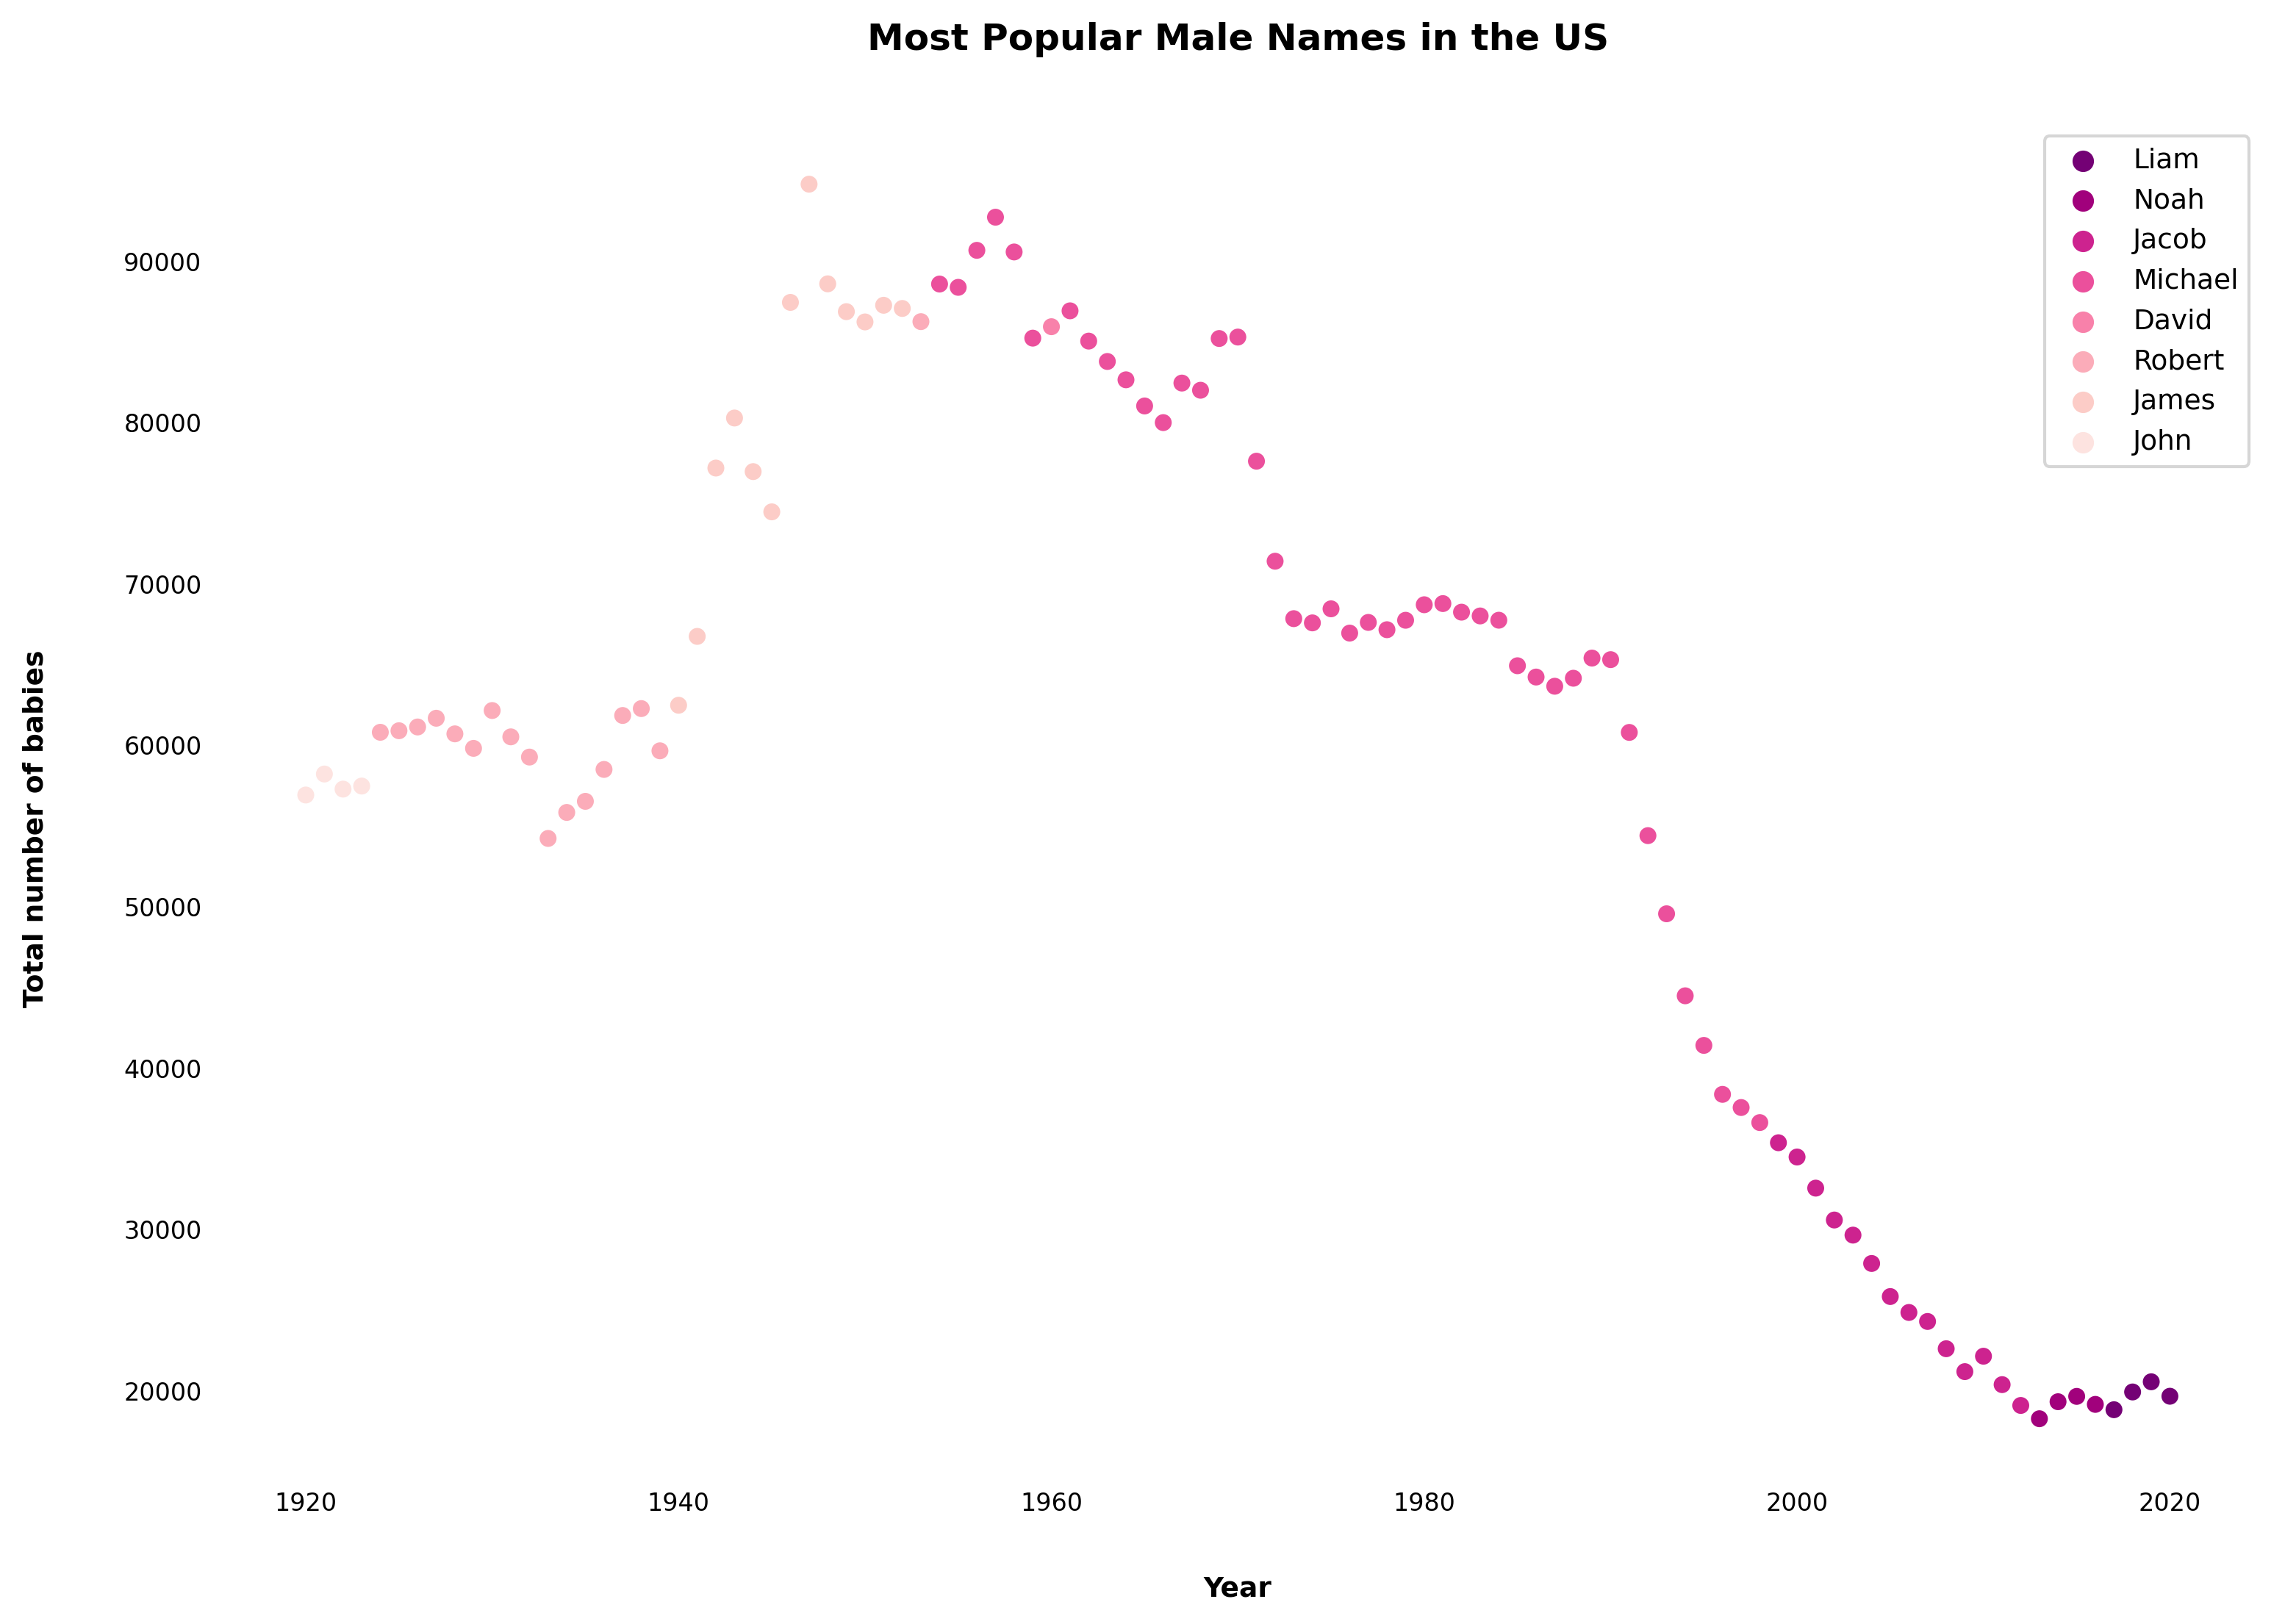

In [15]:
fig, ax = plt.subplots(dpi=300, figsize=(12, 8))

sns.scatterplot(data=top_male_names, x='year', y='num', hue='first_name', ax=ax, palette='RdPu_r')

ax.tick_params(axis='x', zorder=0, length=0, labelsize = 8)
ax.tick_params(axis='y', zorder=0, length=0, labelsize = 8)

ax.set_xlabel('Year', weight='bold', fontsize=9)
ax.set_ylabel('Total number of babies', weight='bold', fontsize=9, rotation=90)

ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.08, .48)

plt.title('Most Popular Male Names in the US', fontsize=12, weight='bold', x=.5, y=1.04)

ax.legend(fontsize=9)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

Noah and Liam have ruled the roost in the last few years, but it looks like Michael and Jacob have also spent a good number of years as the top name.

#### 8. The most years at number one for male names

Now I am going to look into which male name has been number one for the largest number of years.

In [24]:
most_years = pd.read_sql(
"""
WITH cte AS (
SELECT b.year AS year,
       b.first_name AS first_name,
       b.num AS num
FROM baby_names AS b
INNER JOIN (
    SELECT year, MAX(num) AS max_num
    FROM baby_names
    WHERE sex = 'M'
    GROUP BY year) AS subquery
ON subquery.year = b.year
    AND subquery.max_num = b.num
ORDER BY year DESC
)

SELECT first_name,
       COUNT(first_name) AS count_top_name
FROM cte
GROUP BY first_name
ORDER BY count_top_name DESC;
""",
conn)
most_years

,first_name,count_top_name
0,Michael,44
1,Robert,17
2,Jacob,14
3,James,13
4,Noah,4
5,Liam,4
6,John,4
7,David,1


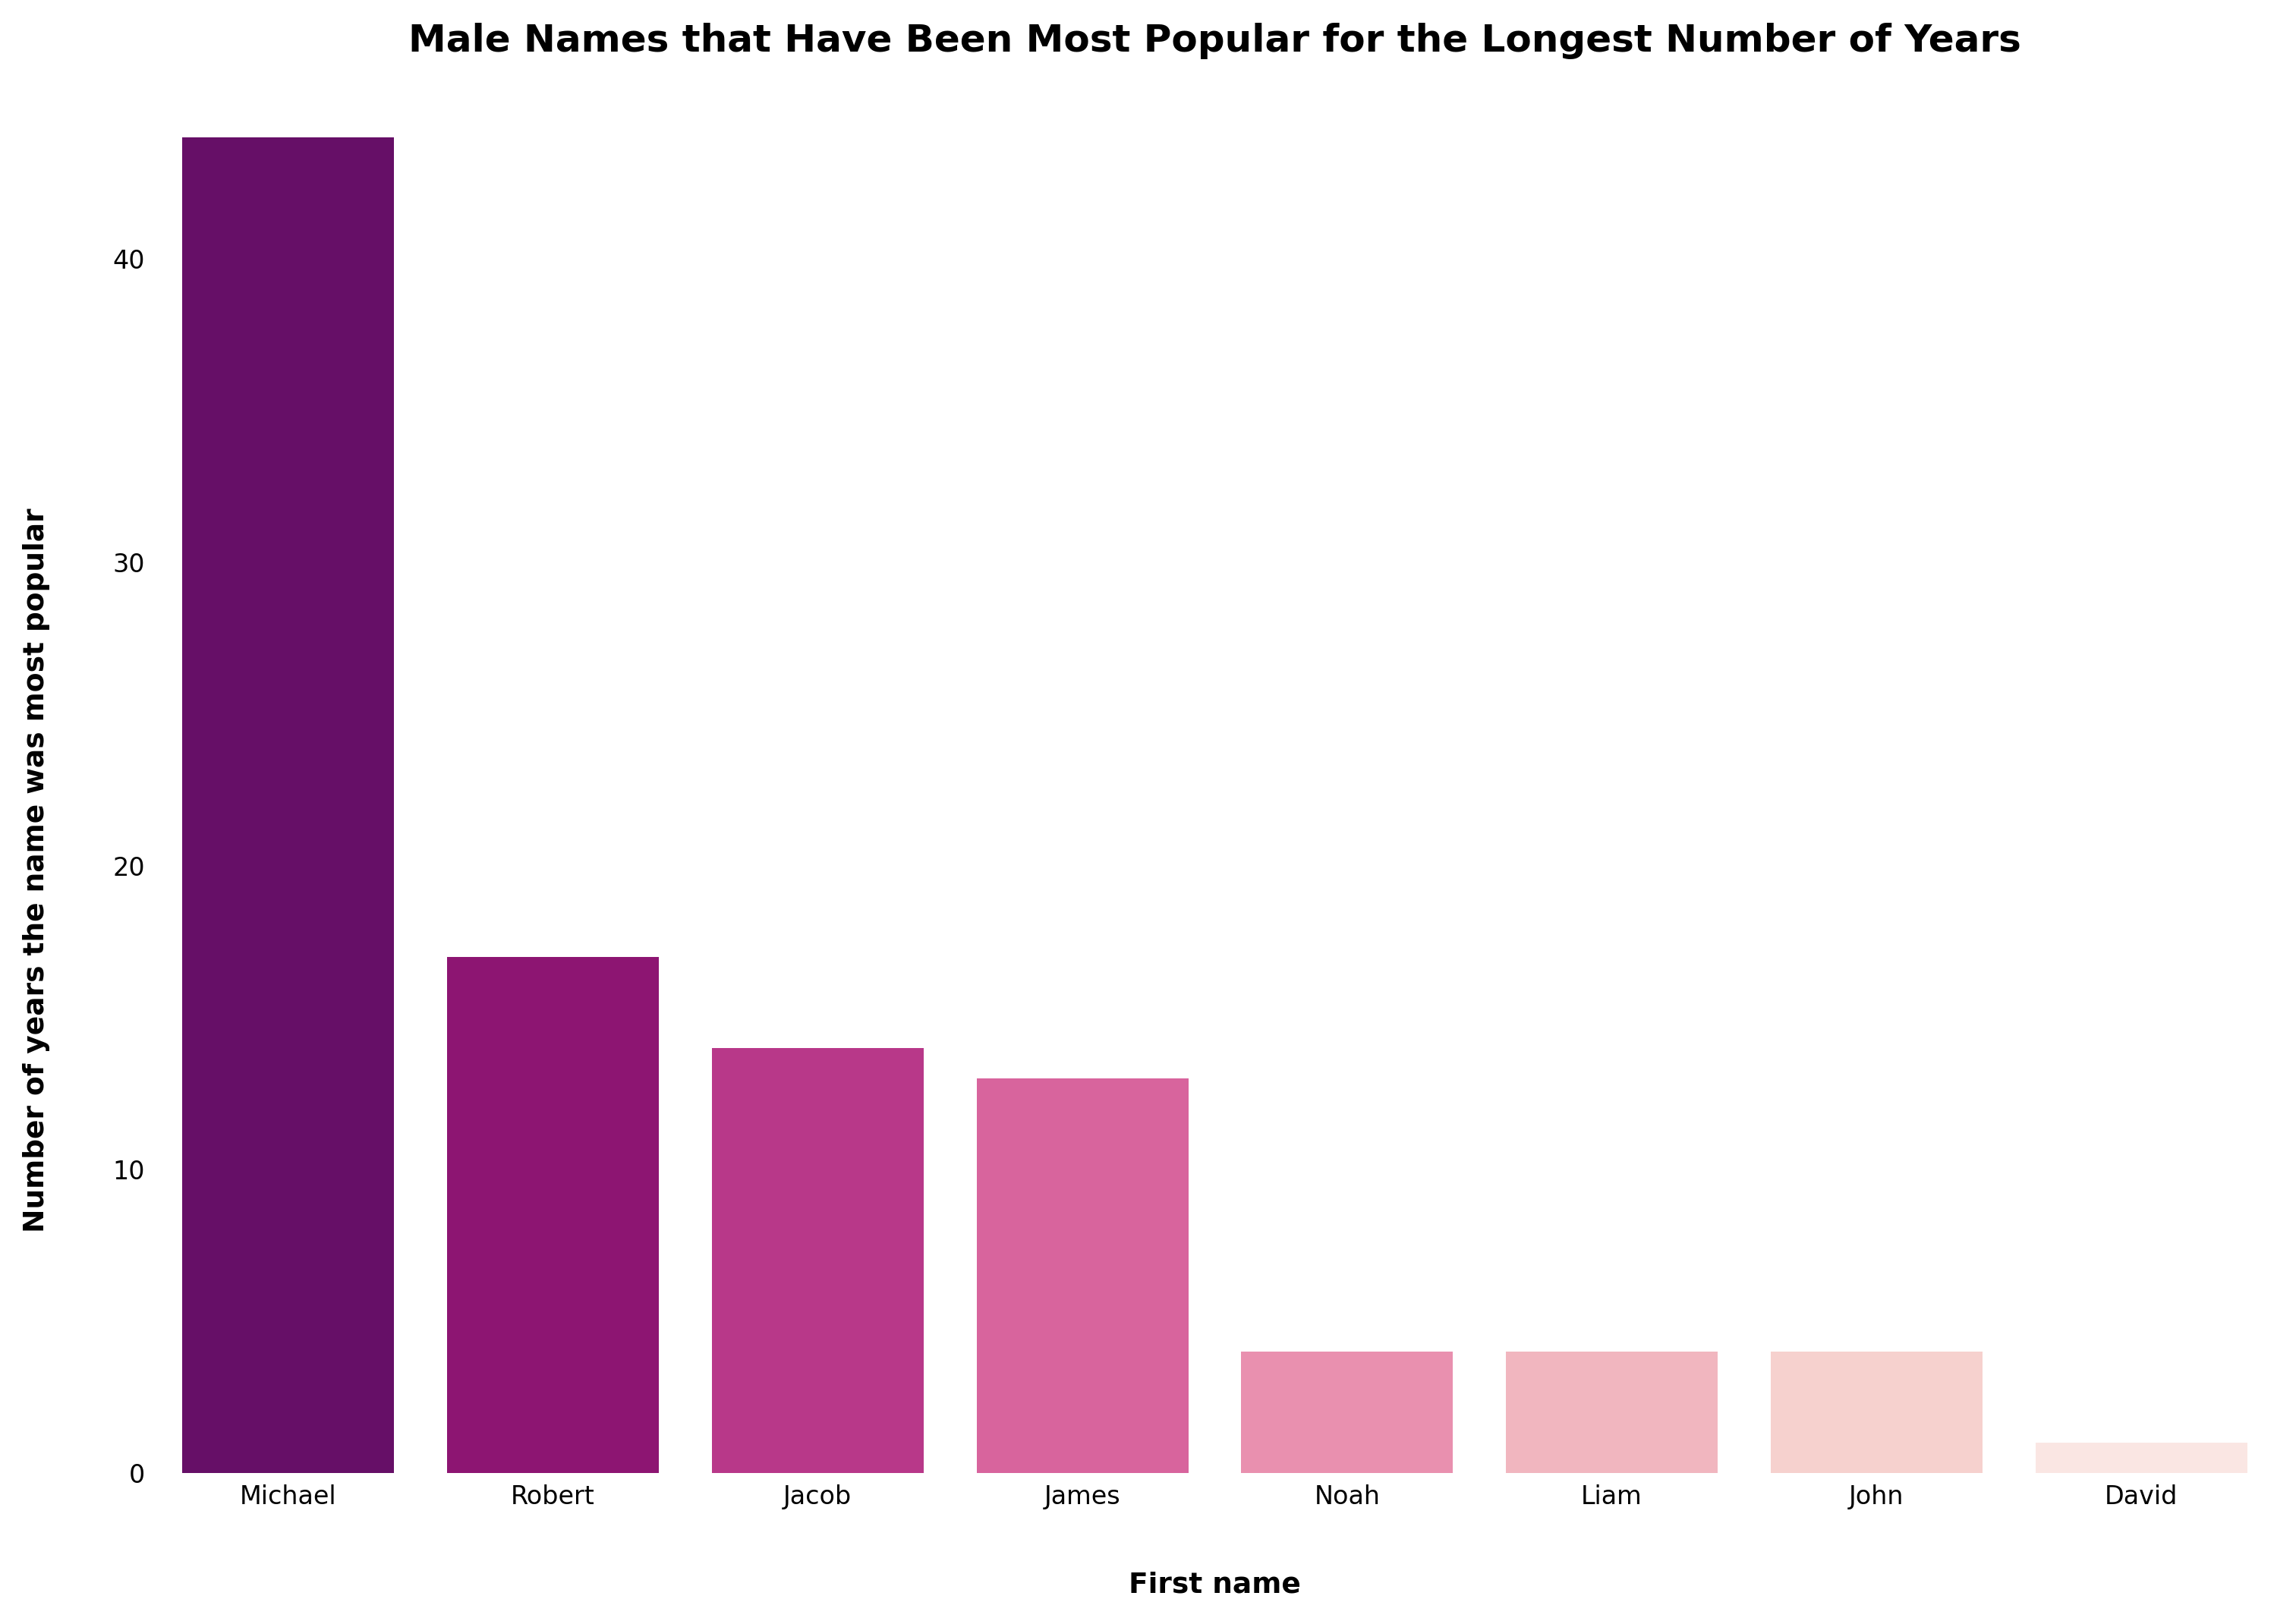

In [26]:
fig, ax = plt.subplots(dpi=300, figsize=(12, 8))

sns.barplot(data=most_years, x='first_name', y='count_top_name', ax=ax, palette='RdPu_r')

ax.tick_params(axis='x', zorder=0, length=0, labelsize = 8)
ax.tick_params(axis='y', zorder=0, length=0, labelsize = 8)

ax.set_xlabel('First name', weight='bold', fontsize=9)
ax.set_ylabel('Number of years the name was most popular', weight='bold', fontsize=9, rotation=90)

ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05, .43)

plt.title('Male Names that Have Been Most Popular for the Longest Number of Years', fontsize=12, weight='bold', x=.5, y=1.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

The name Michael has been at the top for more than 40 years - that is over 20 years longer then the next most popular male name, Robert. This result, combined with the graph before that shows most popular male names over the years, indicates that prior to 2000s a popular male name was given to a lot more babies and names also stayed popular for longer. This is compared to the most recent years. This suggests that there is a bigger variety in the chosen names, as well as people's preferences for names change quicker in the recent years.

#### 9. Top female name over the years

Now, I am going to look at what is the top female name is for each year.

In [18]:
top_female_names = pd.read_sql(
"""
SELECT b.year AS year,
       b.first_name AS first_name,
       b.num AS num
FROM baby_names AS b
INNER JOIN (
    SELECT year, MAX(num) AS max_num
    FROM baby_names
    WHERE sex = 'F'
    GROUP BY year) AS subquery
ON subquery.year = b.year
    AND subquery.max_num = b.num
ORDER BY year DESC;
""",
conn)
top_female_names

,year,first_name,num
0,2020,Olivia,17535
1,2019,Olivia,18508
2,2018,Emma,18770
3,2017,Emma,19837
4,2016,Emma,19522
...,...,...,...
96,1924,Mary,73536
97,1923,Mary,71635
98,1922,Mary,72176
99,1921,Mary,73985


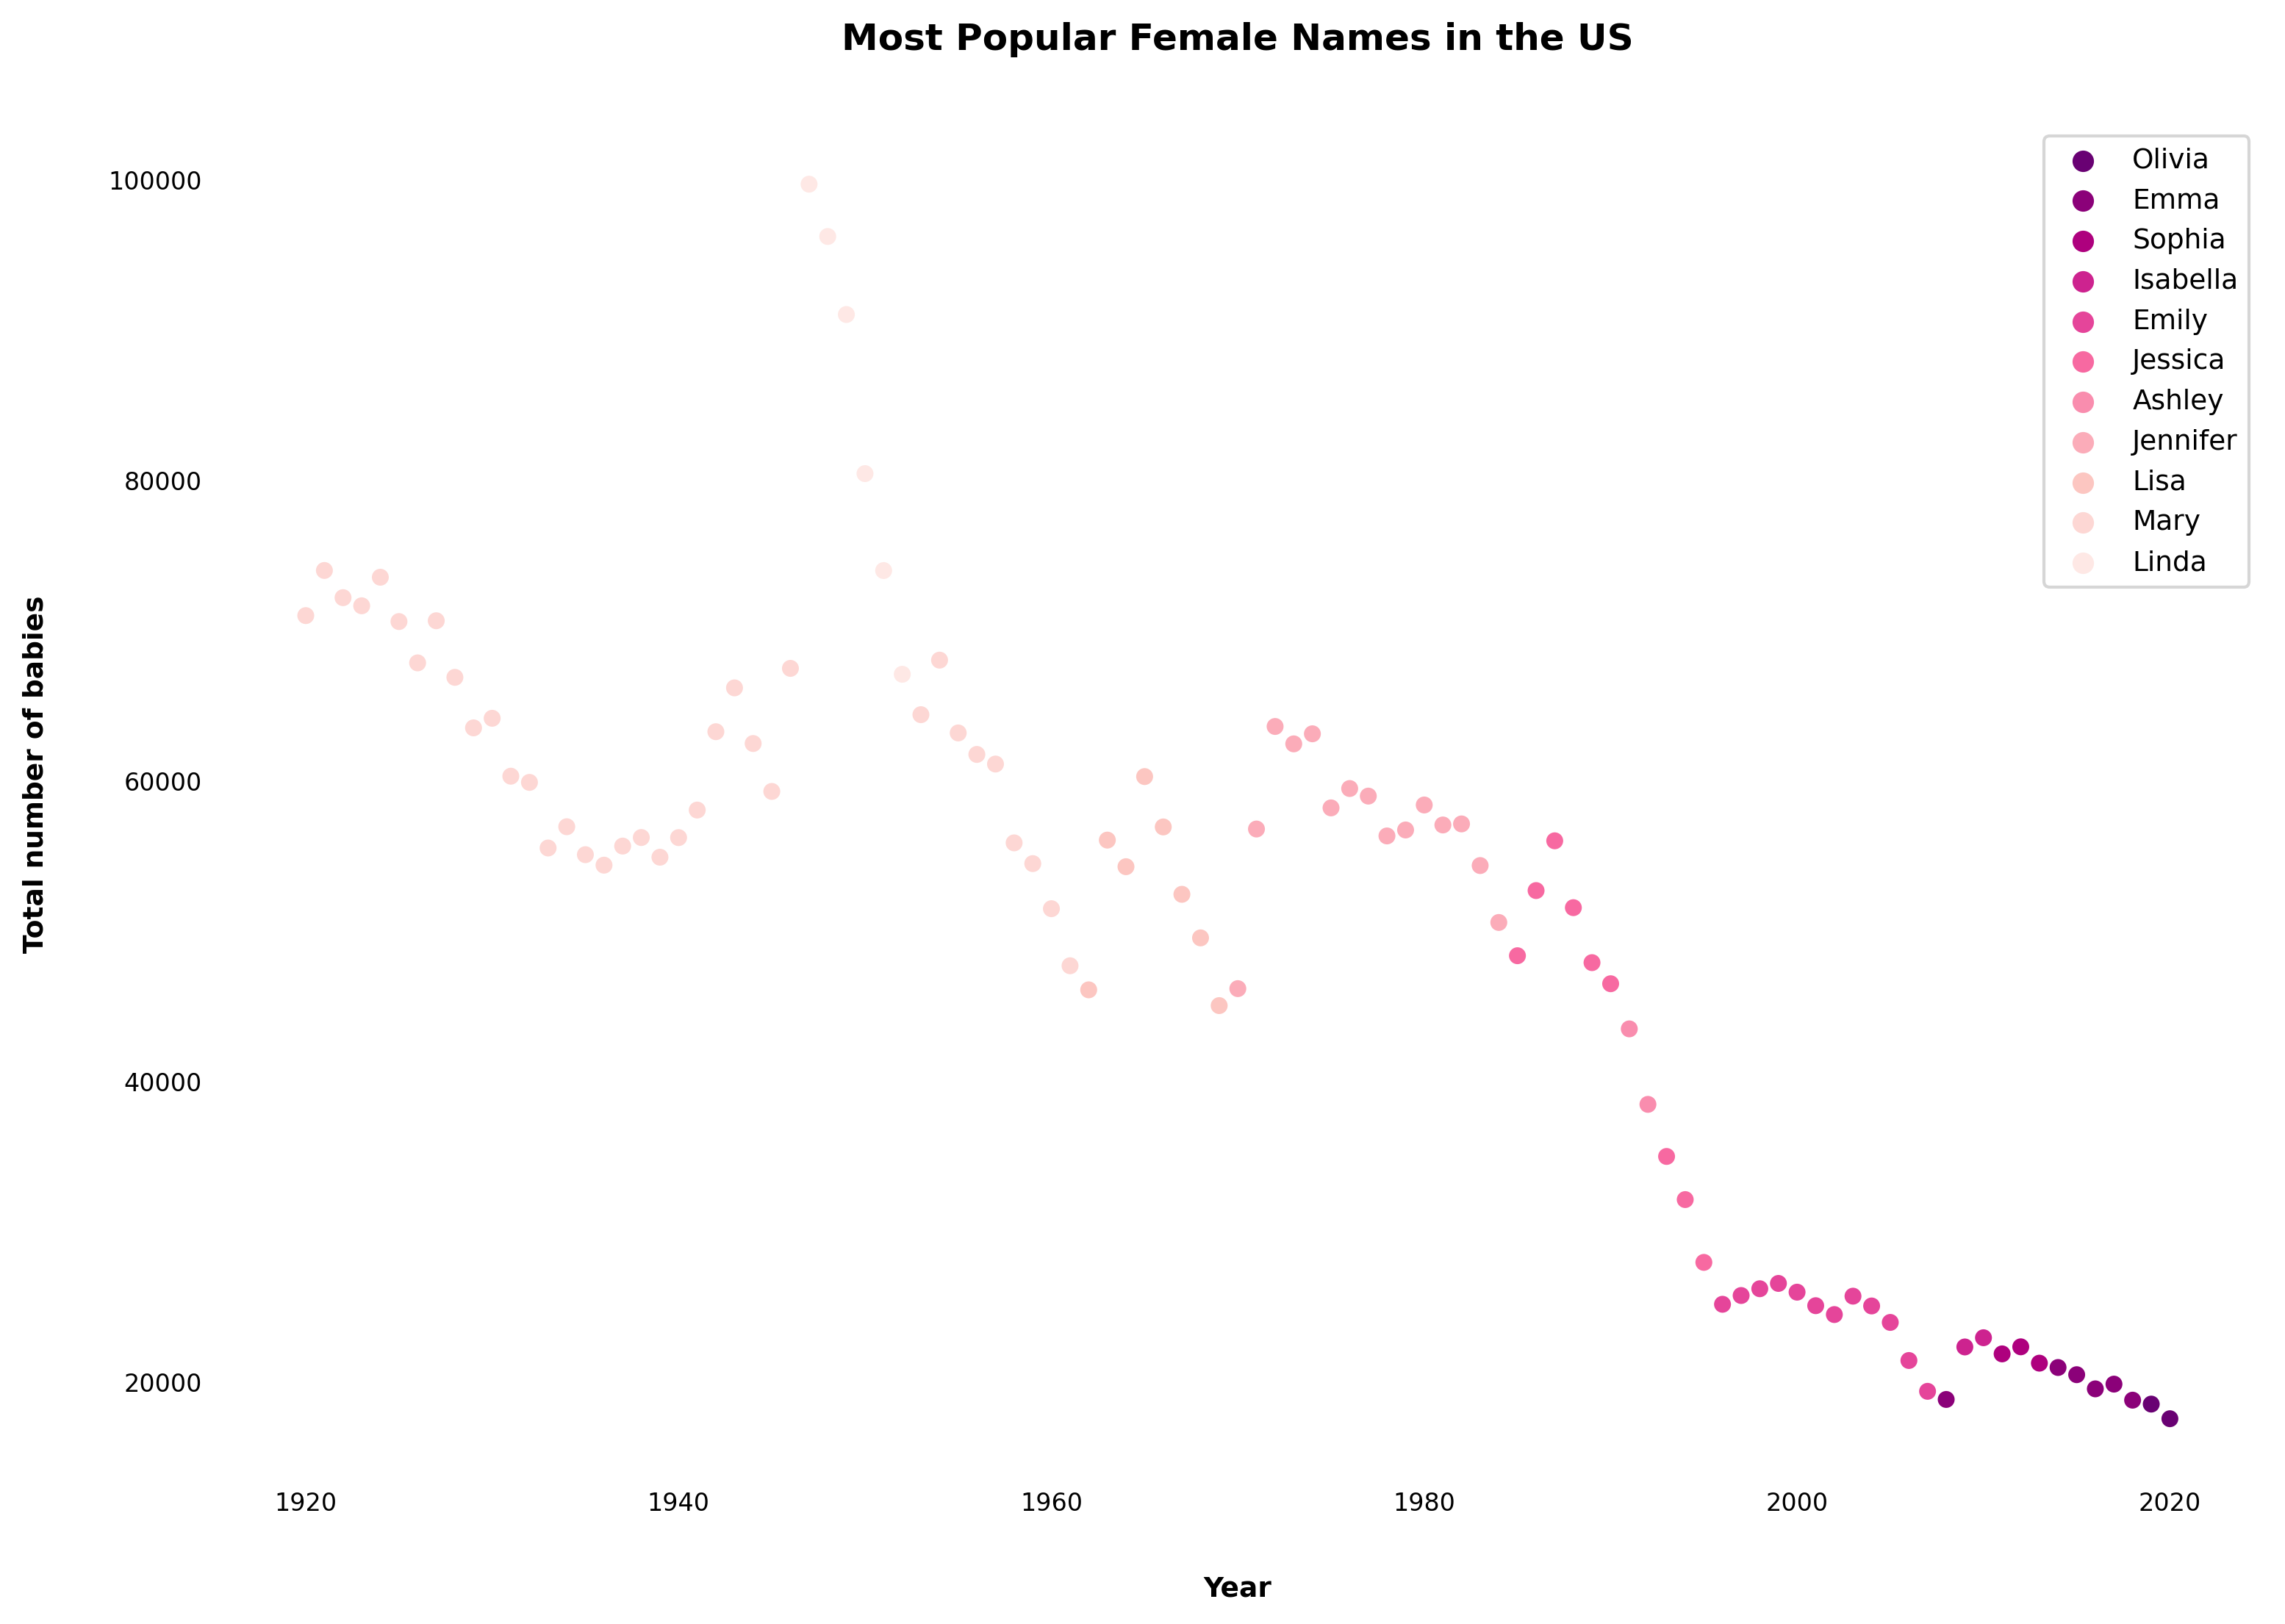

In [19]:
fig, ax = plt.subplots(dpi=300, figsize=(12, 8))

sns.scatterplot(data=top_female_names, x='year', y='num', hue='first_name', ax=ax, palette='RdPu_r')

ax.tick_params(axis='x', zorder=0, length=0, labelsize = 8)
ax.tick_params(axis='y', zorder=0, length=0, labelsize = 8)

ax.set_xlabel('Year', weight='bold', fontsize=9)
ax.set_ylabel('Total number of babies', weight='bold', fontsize=9, rotation=90)

ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.08, .52)

plt.title('Most Popular Female Names in the US', fontsize=12, weight='bold', x=.5, y=1.04)

ax.legend(fontsize=9)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

It can be seen that most recently the names Emily, Emma and Olivia stayed at the top. However, prior to 1970s the name Mary has ruled for a considerable number of years - almost every year between 1920 and 1960, giving place to Linda to several years in 1940s.

This graph mimics the one for male names. There is a bigger variety in the chosen names, as well as people's preferences for names change quicker in the recent years.

#### 10. The most years at number one for female names

Now I am going to look into which male name has been number one for the largest number of years.

In [20]:
most_years = pd.read_sql(
"""
WITH cte AS (
SELECT b.year AS year,
       b.first_name AS first_name,
       b.num AS num
FROM baby_names AS b
INNER JOIN (
    SELECT year, MAX(num) AS max_num
    FROM baby_names
    WHERE sex = 'F'
    GROUP BY year) AS subquery
ON subquery.year = b.year
    AND subquery.max_num = b.num
ORDER BY year DESC
)

SELECT first_name,
       COUNT(first_name) AS count_top_name
FROM cte
GROUP BY first_name
ORDER BY count_top_name DESC;
""",
conn)
most_years

,first_name,count_top_name
0,Mary,36
1,Jennifer,15
2,Emily,12
3,Jessica,9
4,Lisa,8
5,Linda,6
6,Emma,6
7,Sophia,3
8,Olivia,2
9,Isabella,2


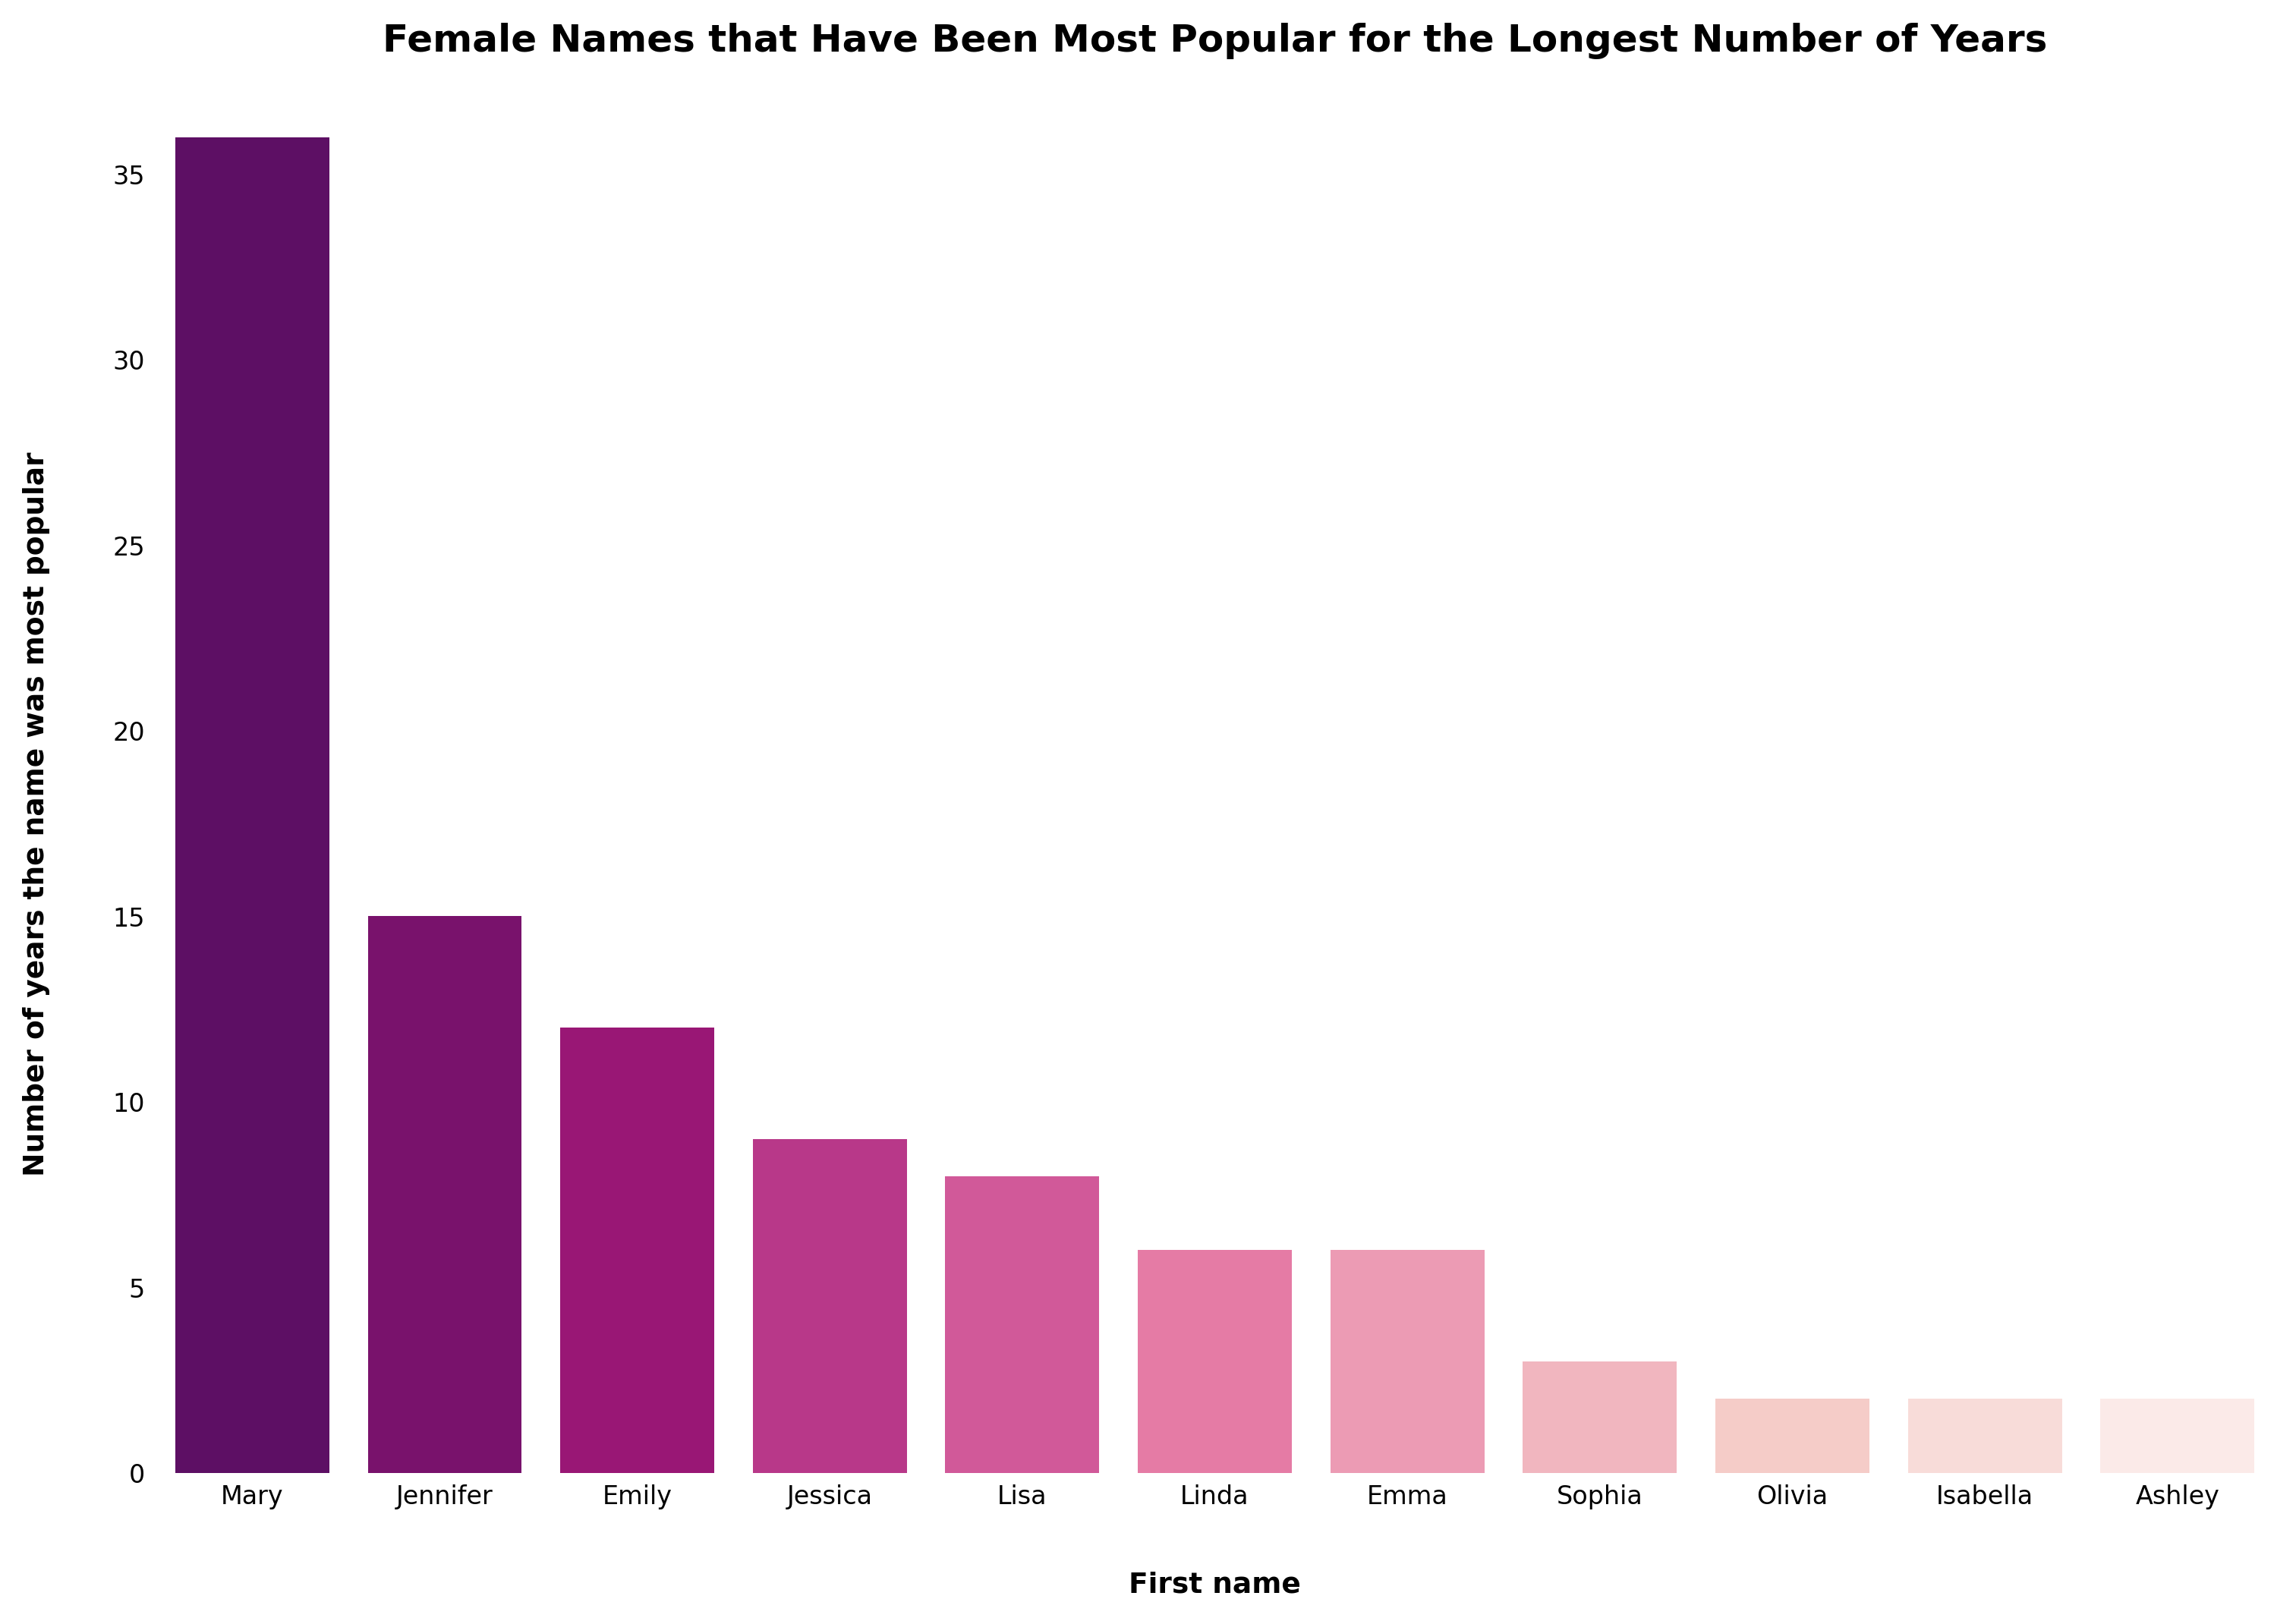

In [21]:
fig, ax = plt.subplots(dpi=300, figsize=(12, 8))

sns.barplot(data=most_years, x='first_name', y='count_top_name', ax=ax, palette='RdPu_r')

ax.tick_params(axis='x', zorder=0, length=0, labelsize = 8)
ax.tick_params(axis='y', zorder=0, length=0, labelsize = 8)

ax.set_xlabel('First name', weight='bold', fontsize=9)
ax.set_ylabel('Number of years the name was most popular', weight='bold', fontsize=9, rotation=90)

ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05, .47)

plt.title('Female Names that Have Been Most Popular for the Longest Number of Years', fontsize=12, weight='bold', x=.5, y=1.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

As noticed above, the name Mary has considerably beaten every other female name by the number of years it has been most popular.